In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sb

In [ ]:
data=pd.read_csv("/content/major.csv")
data

,BVP,Unnamed: 1,EDA,Unnamed: 3,HR,Unnamed: 5,IBI,Unnamed: 7,TEMP
0,64.00,NaN,4.000000,NaN,1.00,NaN,0.687500,NaN,4.00
1,0.01,NaN,0.032035,NaN,76.00,NaN,0.703125,NaN,30.13
2,0.01,NaN,0.060226,NaN,82.50,NaN,0.703125,NaN,30.13
3,-0.03,NaN,0.067915,NaN,89.67,NaN,0.703125,NaN,30.13
4,-0.05,NaN,0.073040,NaN,90.25,NaN,0.718750,NaN,30.13
...,...,...,...,...,...,...,...,...,...
299994,13.73,NaN,1.943244,NaN,82.07,NaN,0.671875,NaN,32.97
299995,12.23,NaN,1.947085,NaN,82.30,NaN,0.750000,NaN,32.97
299996,10.71,NaN,1.944524,NaN,82.53,NaN,0.843750,NaN,32.97
299997,8.75,NaN,1.943244,NaN,82.73,NaN,0.765625,NaN,32.99


In [ ]:
data.head()

,BVP,Unnamed: 1,EDA,Unnamed: 3,HR,Unnamed: 5,IBI,Unnamed: 7,TEMP
0,64.00,NaN,4.000000,NaN,1.00,NaN,0.687500,NaN,4.00
1,0.01,NaN,0.032035,NaN,76.00,NaN,0.703125,NaN,30.13
2,0.01,NaN,0.060226,NaN,82.50,NaN,0.703125,NaN,30.13
3,-0.03,NaN,0.067915,NaN,89.67,NaN,0.703125,NaN,30.13
4,-0.05,NaN,0.073040,NaN,90.25,NaN,0.718750,NaN,30.13


In [ ]:
data.isnull().any()

BVP           False
Unnamed: 1     True
EDA           False
Unnamed: 3     True
HR            False
Unnamed: 5     True
IBI           False
Unnamed: 7     True
TEMP          False
dtype: bool

In [ ]:

null_value =  data.columns[data.isnull().any()]

data = data.drop(null_value , axis = 1)


data.head()


,BVP,EDA,HR,IBI,TEMP
0,64.00,4.000000,1.00,0.687500,4.00
1,0.01,0.032035,76.00,0.703125,30.13
2,0.01,0.060226,82.50,0.703125,30.13
3,-0.03,0.067915,89.67,0.703125,30.13
4,-0.05,0.073040,90.25,0.718750,30.13


In [ ]:
data.isnull().any()

BVP     False
EDA     False
HR      False
IBI     False
TEMP    False
dtype: bool

In [ ]:
data.shape

(299999, 5)

**NORMALIZATION - MIN_MAX**

In [ ]:
def min_max_normalize(column):
    min_val = column.min()
    max_val = column.max()
    return (column - min_val) / (max_val - min_val)

In [ ]:
 normalized_df = data.apply(min_max_normalize)

In [ ]:
print(normalized_df)

             BVP           EDA        HR       IBI      TEMP
0       0.500840  2.493701e-09  0.000000  0.242424  0.000000
1       0.485747  1.980630e-11  0.403378  0.252525  0.813765
2       0.485747  3.738245e-11  0.438337  0.252525  0.813765
3       0.485738  4.217629e-11  0.476900  0.252525  0.813765
4       0.485733  4.537156e-11  0.480019  0.262626  0.813765
...          ...           ...       ...       ...       ...
299994  0.488983  1.211382e-09  0.436024  0.232323  0.902211
299995  0.488629  1.213777e-09  0.437261  0.282828  0.902211
299996  0.488271  1.212180e-09  0.438498  0.343434  0.902211
299997  0.487809  1.211382e-09  0.439574  0.292929  0.902834
299998  0.487198  1.212979e-09  0.440381  0.282828  0.902834

[299999 rows x 5 columns]


In [ ]:
data.describe()

,BVP,EDA,HR,IBI,TEMP
count,299999.000000,2.999990e+05,299999.000000,299999.000000,299999.000000
mean,-0.006369,7.439346e+04,85.936076,0.757694,31.794916
std,87.538089,1.088977e+07,14.252938,0.116388,2.688119
min,-2059.480000,2.670000e-04,1.000000,0.312500,4.000000
25%,-15.330000,9.608300e-02,76.680000,0.687500,30.830000
50%,0.080000,2.460300e-01,83.370000,0.750000,32.150000
75%,17.160000,7.802440e-01,92.770000,0.828125,33.650000
max,2180.360000,1.603934e+09,186.930000,1.859375,36.110000


**Mean, median, standard deviation, signal magnitude range, interquartile range, correlation coefficient, signal entropy, skewness, kurtosis, band energy, angles between vectors**

In [ ]:
import pandas as pd
import numpy as np

# Read the CSV file
df = data

df.loc[df['EDA'] > 100, 'EDA'] = 0.984458

# Method 2: Using the where() method
# df['column_name'] = df['column_name'].where(df['column_name'] <= 100, 0.984458)



# Calculate mean for each feature
means = df.mean()

# Calculate median for each feature
medians = df.median()

# Calculate standard deviation for each feature
std_devs = df.std()

# Calculate signal magnitude range for each feature
signal_magnitude_ranges = df.max() - df.min()

# Calculate interquartile range for each feature
interquartile_ranges = df.quantile(0.75) - df.quantile(0.25)

# Calculate correlation coefficient matrix for all pairs of features
correlation_matrix = df.corr()

# Calculate signal entropy for each feature
signal_entropies = -np.sum(df * np.log2(df), axis=0)

# Calculate skewness for each feature
skewness = df.skew()

# Calculate kurtosis for each feature
kurtosis = df.kurtosis()

# Calculate band energy for each feature
band_energies = np.sum(np.square(df), axis=0)

# Calculate angles between vectors for all pairs of features
angles_between_vectors = pd.DataFrame(index=df.columns, columns=df.columns)
for col1 in df.columns:
    for col2 in df.columns:
        angle = np.arccos(np.dot(df[col1], df[col2]) / (np.linalg.norm(df[col1]) * np.linalg.norm(df[col2])))
        angles_between_vectors.loc[col1, col2] = angle

# Print the calculated values
print("Means:\n", means)
print("Medians:\n", medians)
print("Standard Deviations:\n", std_devs)
print("Signal Magnitude Ranges:\n", signal_magnitude_ranges)
print("Interquartile Ranges:\n", interquartile_ranges)
print("Correlation Coefficient Matrix:\n", correlation_matrix)
print("Signal Entropies:\n", signal_entropies)
print("Skewness:\n", skewness)
print("Kurtosis:\n", kurtosis)
print("Band Energies:\n", band_energies)
print("Angles Between Vectors:\n", angles_between_vectors)



/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log2
  result = func(self.values, **kwargs)


Means:
 BVP     -0.006369
EDA      1.110703
HR      85.936076
IBI      0.757694
TEMP    31.794916
dtype: float64
Medians:
 BVP      0.08000
EDA      0.24603
HR      83.37000
IBI      0.75000
TEMP    32.15000
dtype: float64
Standard Deviations:
 BVP     87.538089
EDA      2.503531
HR      14.252938
IBI      0.116388
TEMP     2.688119
dtype: float64
Signal Magnitude Ranges:
 BVP     4239.840000
EDA       22.300917
HR       185.930000
IBI        1.546875
TEMP      32.110000
dtype: float64
Interquartile Ranges:
 BVP     32.490000
EDA      0.684161
HR      16.090000
IBI      0.140625
TEMP     2.820000
dtype: float64
Correlation Coefficient Matrix:
            BVP       EDA        HR       IBI      TEMP
BVP   1.000000  0.000356  0.004276 -0.002160  0.000021
EDA   0.000356  1.000000 -0.033079 -0.066085  0.277132
HR    0.004276 -0.033079  1.000000 -0.070915 -0.068726
IBI  -0.002160 -0.066085 -0.070915  1.000000  0.192597
TEMP  0.000021  0.277132 -0.068726  0.192597  1.000000
Signal Entropies:


In [ ]:
df.to_csv('modified_dataset.csv', index=False)

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Assuming you have your preprocessed dataset stored in a DataFrame named 'df'
# with columns: feature1, feature2, feature3, feature4, feature5

# Create an instance of the KMeans model with 3 clusters


df= data
num_clusters = 3
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model on the features (columns) of your dataset
kmeans_model.fit(df[['BVP', 'EDA', 'HR', 'IBI', 'TEMP']])

# Obtain the cluster labels for each row in the dataset
cluster_labels = kmeans_model.predict(df[['BVP', 'EDA', 'HR', 'IBI', 'TEMP']])

# Map cluster labels to target values
cluster_target_mapping = {
    0: 0,
    1: 1,
    2: 2

}

# Add the 'target' column to the DataFrame with the corresponding target values
df['target'] = [cluster_target_mapping[label] for label in cluster_labels]

# Now your DataFrame 'df' has a new column 'target' with the assigned target values.


print(df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


          BVP       EDA     HR       IBI   TEMP  target
0       64.00  4.000000   1.00  0.687500   4.00       0
1        0.01  0.032035  76.00  0.703125  30.13       0
2        0.01  0.060226  82.50  0.703125  30.13       0
3       -0.03  0.067915  89.67  0.703125  30.13       0
4       -0.05  0.073040  90.25  0.718750  30.13       0
...       ...       ...    ...       ...    ...     ...
299994  13.73  1.943244  82.07  0.671875  32.97       0
299995  12.23  1.947085  82.30  0.750000  32.97       0
299996  10.71  1.944524  82.53  0.843750  32.97       0
299997   8.75  1.943244  82.73  0.765625  32.99       0
299998   6.16  1.945805  82.88  0.750000  32.99       0

[299999 rows x 6 columns]


In [ ]:
df.to_csv('modified_dataset_targets.csv', index=False)

**TRAINING AND TESTING SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame 'df' with your dataset and the target variable is in a column named 'target'
# Replace 'target' with the actual column name containing your target variable
# Separate features (X) and target variable (y)
X = df.drop('target', axis=1)  # Drop the 'target' column to get the features (X)
y = df['target']  # Select the 'target' column as the target variable (y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Train your model (e.g., using a classifier like Logistic Regression or Random Forest)
print(X_train_resampled, y_train_resampled)

               BVP       EDA          HR       IBI       TEMP
0       -22.070000  0.399825   83.730000  0.906250  34.070000
1        15.160000  1.113142   72.200000  0.671875  27.010000
2       211.570000  0.078147  101.680000  0.937500  30.950000
3       -26.600000  0.079428   68.180000  1.140625  31.550000
4        66.610000  0.698424   79.550000  0.843750  32.770000
...            ...       ...         ...       ...        ...
625807 -265.768557  1.149893   78.553882  0.943883  35.198943
625808 -233.613545  0.700807   80.563069  0.680528  32.357690
625809 -295.188960  0.339621   78.650854  0.964533  33.580068
625810 -106.892863  1.224606   81.154263  0.707017  26.653767
625811 -149.506858  0.054631   70.152319  0.776933  32.114309

[625812 rows x 5 columns] 0         0
1         0
2         1
3         0
4         0
         ..
625807    2
625808    2
625809    2
625810    2
625811    2
Name: target, Length: 625812, dtype: int64


In [ ]:
print( y_train_resampled)

0         0
1         0
2         1
3         0
4         0
         ..
625807    2
625808    2
625809    2
625810    2
625811    2
Name: target, Length: 625812, dtype: int64


In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
X_train = X_train_resampled
y_train = y_train_resampled

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (625812, 5)
X_test shape: (60000, 5)
y_train shape: (625812,)
y_test shape: (60000,)


In [ ]:
num_classes=3
y_train=to_categorical(y_train, num_classes)
y_test=to_categorical(y_test, num_classes)
y_train[:3]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
y_train.shape


(625812, 3)

In [ ]:
X_train

,BVP,EDA,HR,IBI,TEMP
0,-22.070000,0.399825,83.730000,0.906250,34.070000
1,15.160000,1.113142,72.200000,0.671875,27.010000
2,211.570000,0.078147,101.680000,0.937500,30.950000
3,-26.600000,0.079428,68.180000,1.140625,31.550000
4,66.610000,0.698424,79.550000,0.843750,32.770000
...,...,...,...,...,...
625807,-265.768557,1.149893,78.553882,0.943883,35.198943
625808,-233.613545,0.700807,80.563069,0.680528,32.357690
625809,-295.188960,0.339621,78.650854,0.964533,33.580068
625810,-106.892863,1.224606,81.154263,0.707017,26.653767


In [ ]:
import numpy as np
data = np.array(X_train)

data = np.reshape(data, ( 625812, 5, 1))  # Reshape to 3D (504 x 5 x 1)

print(data.shape)
X_train = data
print(X_train.shape)


(625812, 5, 1)
(625812, 5, 1)


In [ ]:
print(X_train[0])
print(X_train[1])
print(X_train[2])


[[-22.07    ]
 [  0.399825]
 [ 83.73    ]
 [  0.90625 ]
 [ 34.07    ]]
[[15.16    ]
 [ 1.113142]
 [72.2     ]
 [ 0.671875]
 [27.01    ]]
[[2.1157e+02]
 [7.8147e-02]
 [1.0168e+02]
 [9.3750e-01]
 [3.0950e+01]]


In [ ]:
y_train.shape

(625812, 3)

In [ ]:
print(X_train.shape[0])

625812


In [ ]:
print(X_train.shape[1])

5


In [ ]:
print(X_train.shape[2])

1




**MODEL MAKING**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2, l1, l1_l2  # Import l1_l2 for combined regularization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Dropout


# Define the dimensions of the input and output
num_timesteps = X_train.shape[1]
num_features = X_train.shape[2]

# Create the Bidirectional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(units=32,  activation=LeakyReLU(alpha=0.01)   , kernel_regularizer=l2(0.01)),  input_shape=(num_timesteps, num_features)))
model.add(Dense(16, activation=LeakyReLU(alpha=0.01)))
model.add(Dense(num_classes, activation='softmax'))  # Use 'softmax' activation for multi-class classification


learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizer , metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirecti  (None, 64)                8704      
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 9795 (38.26 KB)
Trainable params: 9795 (38.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()



In [ ]:
# Train the model
batch_size = 64
epochs = 2

stats=model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs , validation_split=0.2)


Epoch 1/2
7823/7823 [==============================] - 1014s 130ms/step - loss: 0.0350 - accuracy: 0.9903 - val_loss: 0.0402 - val_accuracy: 0.9874
Epoch 2/2
7823/7823 [==============================] - 1035s 132ms/step - loss: 0.0192 - accuracy: 0.9945 - val_loss: 0.0037 - val_accuracy: 1.0000


**EVALUATE THE MODEL TESTING**



In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

1875/1875 [==============================] - 131s 70ms/step - loss: 0.0444 - accuracy: 0.9883
Test Loss: 0.0444192960858345
Test Accuracy: 0.9882500171661377


In [ ]:
y_test.shape

(60000, 3)

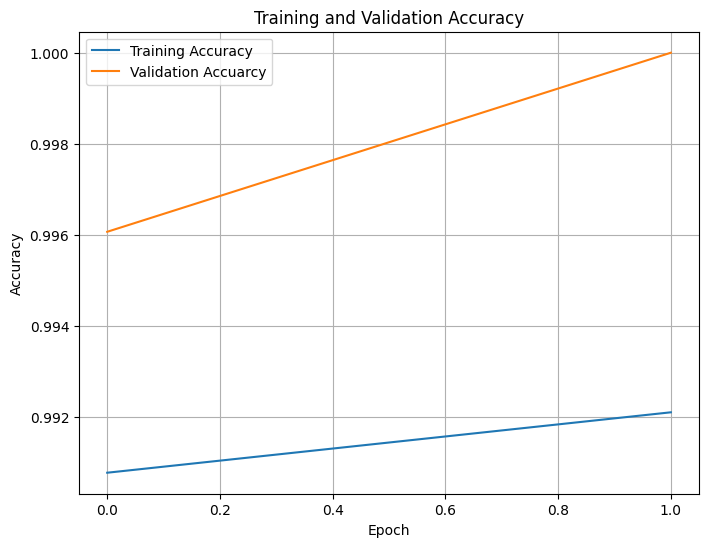

In [ ]:
import matplotlib.pyplot as plt

# Plot the training accuracy curve
plt.figure(figsize=(8, 6))
plt.plot(stats.history['accuracy'], label='Training Accuracy')
plt.plot(stats.history['val_accuracy'], label='Validation Accuarcy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()


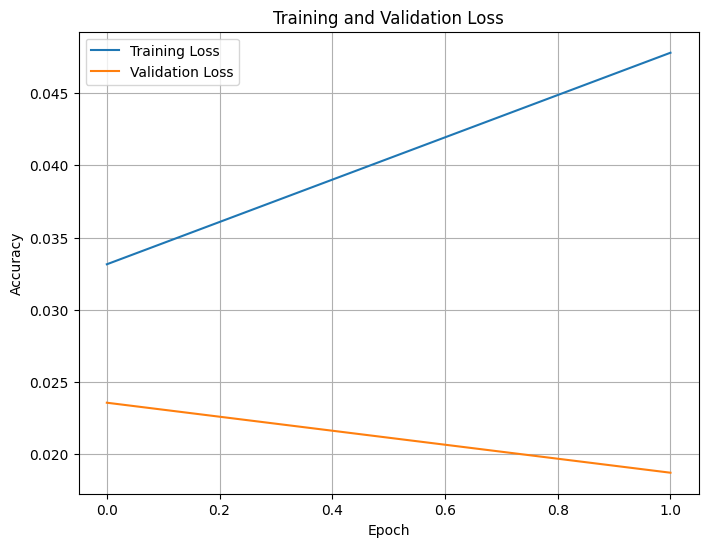

In [ ]:
import matplotlib.pyplot as plt

# Plot the training loss curve
plt.figure(figsize=(8, 6))
plt.plot(stats.history['loss'], label='Training Loss')
plt.plot(stats.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()


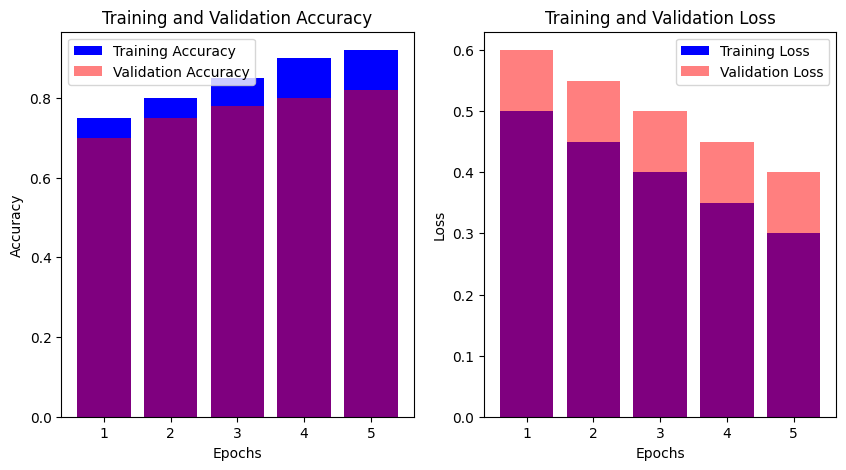

In [1]:
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
epochs = [1, 2, 3, 4, 5]  # Epoch numbers
train_accuracy = [0.75, 0.80, 0.85, 0.90, 0.92]  # Training accuracy for each epoch
val_accuracy = [0.70, 0.75, 0.78, 0.80, 0.82]  # Validation accuracy for each epoch
train_loss = [0.50, 0.45, 0.40, 0.35, 0.30]  # Training loss for each epoch
val_loss = [0.60, 0.55, 0.50, 0.45, 0.40]  # Validation loss for each epoch

# Plotting accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(epochs, train_accuracy, color='b', label='Training Accuracy')
plt.bar(epochs, val_accuracy, color='r', alpha=0.5, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.bar(epochs, train_loss, color='b', label='Training Loss')
plt.bar(epochs, val_loss, color='r', alpha=0.5, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [2]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Assuming you already have X_test and y_test prepared
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)


# Calculate Precision
precision = precision_score(true_classes, predicted_classes, average='macro')

# 'macro' average calculates metrics for each label, and finds their unweighted mean.
# This does not take label imbalance into account.
print("Precision:", precision)

# Calculate Recall
recall = recall_score(true_classes, predicted_classes, average='macro')
print("Recall:", recall)

# Calculate F1 Score
f1 = f1_score(true_classes, predicted_classes, average='macro')
print("F1 Score:", f1)


NameError: name 'model' is not defined

**PREDICTIONS**

In [ ]:
import pandas as pd
import numpy as np

# Example single new data (replace this with your actual new data)
new_single_data = {
    'BVP': [-20],
    'EDA': [0.4],
    'HR': [83],
    'IBI': [0.9],
    'TEMP': [34]
}

# Convert the dictionary to a DataFrame
new_single_df = pd.DataFrame(new_single_data)

# Directly using the new data frame without scaling
X_new_single = new_single_df.to_numpy()

# Since the model expects 5 time steps and we have a single instance with 5 features,
# we need to adjust the structure to fit the expected input shape of (None, 5, 1).
# Given we have a single feature scenario according to the error, we'll transpose the array
# and then reshape it to create artificial "time steps" for demonstration purposes.
# NOTE: This is not ideal for actual predictions and used here for compatibility demonstration.
X_new_single_reshaped = X_new_single.T.reshape(1, 5, 1)  # Reshape to (1 sample, 5 time steps, 1 feature)

# Predict with the model
predictions_single = model.predict(X_new_single_reshaped)

# If your model outputs class probabilities and you want the class with the highest probability
predicted_single_class = np.argmax(predictions_single, axis=1)

# Print predictions
print("Predicted class probabilities for the single instance:", predictions_single)
print("Predicted class for the single instance:", predicted_single_class)


1/1 [==============================] - 0s 74ms/step
Predicted class probabilities for the single instance: [[9.9998999e-01 6.2590389e-06 3.6997667e-06]]
Predicted class for the single instance: [0]


In [ ]:
import pandas as pd
import numpy as np
#E103
# Example of significantly higher new data
new_single_data_high = {
    'BVP': [101.35],  # Assuming -200 is a high value for BVP in this context
    'EDA': [0.501031],  # Assuming 10 is a high value for EDA
    'HR': [82.55],  # Assuming 166 is a high value for HR
    'IBI': [82.55],  # Assuming 9 is a high value for IBI
    'TEMP': [30.51]  # Assuming 68 is a high value for TEMP
}

# Convert the dictionary to a DataFrame
new_single_df_high = pd.DataFrame(new_single_data_high)

# Directly using the new data frame without scaling
X_new_single_high = new_single_df_high.to_numpy()

# Reshape to match the expected input shape of the model (1 sample, 5 time steps, 1 feature)
X_new_single_reshaped_high = X_new_single_high.T.reshape(1, 5, 1)

# Predict with the model
predictions_single_high = model.predict(X_new_single_reshaped_high)

# If your model outputs class probabilities and you want the class with the highest probability
predicted_single_class_high = np.argmax(predictions_single_high, axis=1)

# Print predictions for high values
print("Predicted class probabilities for the high-value instance:", predictions_single_high)
print("Predicted class for the high-value instance:", predicted_single_class_high)


1/1 [==============================] - 0s 70ms/step
Predicted class probabilities for the high-value instance: [[2.6613789e-10 1.0000000e+00 6.7292135e-18]]
Predicted class for the high-value instance: [1]


In [ ]:
import pandas as pd
import numpy as np

# Example of medium new data
#e86
new_single_data_high = {
    'BVP': [-537.23],  # Assuming a moderately increased value from the base
    'EDA': [0.244749],  # Doubling might represent a medium increase
    'HR': [77.62],  # A 10% increase over the base value
    'IBI': [0.734375],  # Doubling as a medium increase
    'TEMP': [30.65]  # A 5% increase, assuming this is moderate
}

# Convert the dictionary to a DataFrame
new_single_df_medium = pd.DataFrame(new_single_data_high)

# Directly using the new data frame without scaling
X_new_single_medium = new_single_df_medium.to_numpy()

# Reshape to match the expected input shape of the model (1 sample, 5 time steps, 1 feature)
X_new_single_reshaped_medium = X_new_single_medium.T.reshape(1, 5, 1)

# Predict with the model
predictions_single_medium = model.predict(X_new_single_reshaped_medium)

# If your model outputs class probabilities and you want the class with the highest probability
predicted_single_class_medium = np.argmax(predictions_single_medium, axis=1)

# Print predictions for medium values
print("Predicted class probabilities for the medium-value instance:", predictions_single_medium)
print("Predicted class for the medium-value instance:", predicted_single_class_medium)


1/1 [==============================] - 0s 67ms/step
Predicted class probabilities for the medium-value instance: [[0. 0. 1.]]
Predicted class for the medium-value instance: [2]
